# import Necessary Libraries and Data Sets

In [17]:
import numpy as np
import pandas as pd
 
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

# fetal-health-classification

In [4]:
data = pd.read_csv('fetal_health.csv')      # load data set
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Exploratory Data Analysis (EDA) and Analysis
In this step we want to get basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In [5]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
print(f"Dataset Columns:\n{data.columns}")

Dataset Columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


## DataFrame.describe() 

method generates descriptive statistics for only numeric values not for categorical values. This method summarizes the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

Now, let's understand the statistics that are generated by the describe() method:

Count tells us the number of NoN-empty rows in a feature. As we can see there are no NoN-empty rows.
Mean tells us the mean value of that feature.
Std tells us the Standard Deviation Value of that feature.
Min tells us the minimum value of that feature.
25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
Max tells us the maximum value of that feature.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


## DataFrame.info()
method prints a concise summary of a DataFrame.
This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

In [8]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
print(f"The dataset size: {data.shape}")

The dataset size: (2126, 22)


## Count the missing and null values
Here is good to count the missing and null values.
In the case of a real-world dataset, it is very common that some values in the dataset are missing.
We represent these missing values as NaN (Not a Number) values. 
But to build a good machine learning model our dataset should be complete. 
That’s why we use some imputation techniques to replace the NaN values with some probable values.

In [10]:
miss_values = data.columns[data.isnull().any()]
print(f"Missing values:\n{data[miss_values].isnull().sum()}")

null_values = data.columns[data.isna().any()]
print(f"Null values:\n{data[null_values].isna().sum()}")

Missing values:
Series([], dtype: float64)
Null values:
Series([], dtype: float64)


## Analyze and visualize the target column (fetal_health)
We use the describe() method for our target column to show the descriptive statistics
include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.

In [16]:
data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

Data visualizations of "fetal_health" column makes easier to understand the fetal state,
and visualization also makes it easier to detect patterns of the fetal state (Normal, Suspect, Pathological).

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


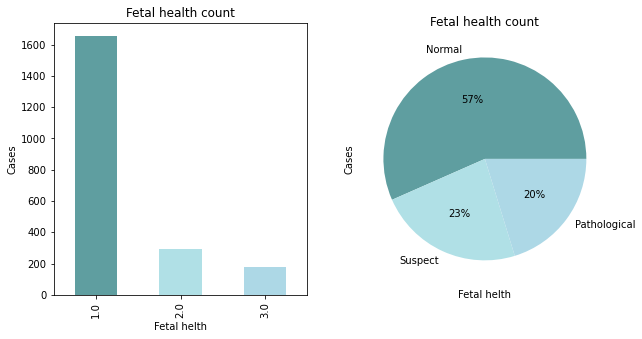

In [56]:
total = data["fetal_health"].sum()
normal = total - 471
suspect = total - 1831
pathological = total - 1950

print(data["fetal_health"].value_counts())

plt.figure(figsize = (10,5))
plt.subplot(121)
# sns.countplot(x="fetal_health", data=data)
vis_fetal_health = data.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color = ["#5F9EA0", "#B0E0E6", "#ADD8E6"])
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")


plt.subplot(122)
# plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], autopct="%1.0f%%")
plt.title("Fetal state") 

vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#5F9EA0", "#B0E0E6", "#ADD8E6"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.xlabel("Fetal helth")
plt.ylabel("Cases")
plt.show()

## Heatmap
A heat map is a two-dimensional representation of information with the help of colors. 
Heat maps can help the user visualize simple or complex information.
Correlation heatmaps are ideal for comparing the measurement for each pair of dimension values.

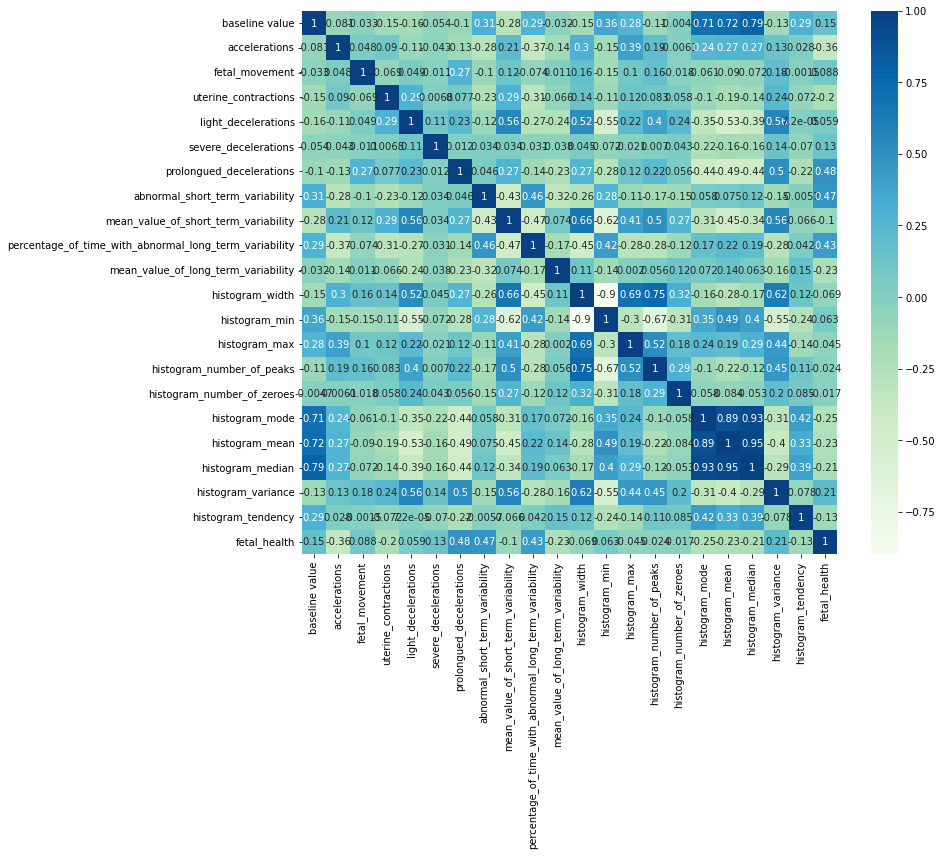

In [19]:

plt.figure(figsize=(12,10))  
p=sns.heatmap(data.corr(), annot=True, cmap = "GnBu")  

## Scaling the data

In [20]:
columns = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']
scale_X = StandardScaler()
X =  pd.DataFrame(scale_X.fit_transform(data.drop(["fetal_health"],axis = 1),), columns = columns)

In [21]:
X.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


## Test Train Split and Cross Validation methods
Train Test Split :
To have unknown datapoints to test the data rather than testing with the same points with which the model was trained.
This helps capture the model performance much better.
Cross-validation, sometimes called rotation estimation or out-of-sample testing,
is any of various similar model validation techniques for assessing 
how the results of a statistical analysis will generalize to an independent data set.

In [57]:
y = data["fetal_health"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

## Building Machine Learning Models:
Logistic Regression (LR)

K-nearest neighbors (KNN)

Random Forest (RF)

Gradient Boosting Machine (GBM)

## Logistic Regression

In [26]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression_mod = logistic_regression.fit(X_train, y_train)
print(f"Baseline Logistic Regression: {round(logistic_regression_mod.score(X_test, y_test), 3)}")

pred_logistic_regression = logistic_regression_mod.predict(X_test)

Baseline Logistic Regression: 0.893


In [32]:
cv_method = StratifiedKFold(n_splits=3,shuffle=True ,
                            random_state=42
                            )

In [33]:
scores_Logistic = cross_val_score(logistic_regression, X_train, y_train, cv =cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Logistic Regression model:\n{scores_Logistic}")
print(f"CrossValMeans: {round(scores_Logistic.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_Logistic.std(), 3)}")

Scores(Cross validate) for Logistic Regression model:
[0.91129032 0.89516129 0.90927419]
CrossValMeans: 0.905
CrossValStandard Deviation: 0.007


In [34]:
params_LR = {"tol": [0.0001,0.0002,0.0003],
            "C": [0.01, 0.1, 1, 10, 100],
            "intercept_scaling": [1, 2, 3, 4]
              }

In [35]:
GridSearchCV_LR = GridSearchCV(estimator=linear_model.LogisticRegression(), 
                                param_grid=params_LR, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [36]:
GridSearchCV_LR.fit(X_train, y_train);

Fitting 3 folds for each of 60 candidates, totalling 180 fits


## Model Performance Analysis

Classification Report: 

Report which includes Precision, Recall and F1-Score.
Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

Precision = TP/TP+FP

Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.

Recall = TP/TP+FN

F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.

F1 Score = 2(Recall Precision) / (Recall + Precision)

In [41]:
print("Classification Report")
print(classification_report(y_test, pred_logistic_regression))

Classification Report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.72      0.67        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.79      0.81       638
weighted avg       0.90      0.89      0.89       638



## Confusion Matrix:

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.

In [42]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_logistic_regression))

Confusion Matrix:
[[470  26   1]
 [ 24  63   1]
 [  4  12  37]]


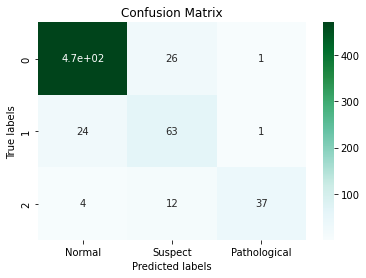

In [43]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_logistic_regression), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## KNN

In [44]:
knn = KNeighborsClassifier()
knn_mod = knn.fit(X_train, y_train)
print(f"Baseline K-Nearest Neighbors: {round(knn_mod.score(X_test, y_test), 3)}")

pred_knn = knn_mod.predict(X_test)

Baseline K-Nearest Neighbors: 0.878


In [45]:
random_forest = RandomForestClassifier()
random_forest_mod = random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest: {round(random_forest_mod.score(X_test, y_test), 3)}")

pred_random_forest = random_forest_mod.predict(X_test)

Baseline Random Forest: 0.929


In [61]:
print("Classification Report")
print(classification_report(y_test, pred_knn))

Classification Report
              precision    recall  f1-score   support

         1.0       0.91      0.97      0.94       497
         2.0       0.63      0.52      0.57        88
         3.0       0.89      0.64      0.75        53

    accuracy                           0.88       638
   macro avg       0.81      0.71      0.75       638
weighted avg       0.87      0.88      0.87       638



In [63]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_knn))

Confusion Matrix:
[[480  16   1]
 [ 39  46   3]
 [  8  11  34]]


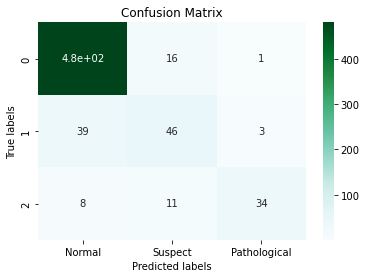

In [64]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## Random forest

In [46]:
scores_RF = cross_val_score(random_forest, X_train, y_train, cv = cv_method, n_jobs = 2, scoring = "accuracy")

print(f"Scores(Cross validate) for Random forest model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3)}")
print(f"CrossValStandard Deviation: {round(scores_RF.std(), 3)}")

Scores(Cross validate) for Random forest model:
[0.92741935 0.93951613 0.93548387]
CrossValMeans: 0.934
CrossValStandard Deviation: 0.005


In [47]:
params_RF = {"min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]             
              }

In [48]:
GridSearchCV_RF = GridSearchCV(estimator=RandomForestClassifier(), 
                                param_grid=params_RF, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [49]:
# Fit model with train data
GridSearchCV_RF.fit(X_train, y_train);

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [50]:
best_estimator_RF = GridSearchCV_RF.best_estimator_
print(f"Best estimator for RF model:\n{best_estimator_RF}")

Best estimator for RF model:
RandomForestClassifier(n_estimators=400)


In [52]:
print("Classification Report")
print(classification_report(y_test, pred_random_forest))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       497
         2.0       0.82      0.73      0.77        88
         3.0       0.88      0.87      0.88        53

    accuracy                           0.93       638
   macro avg       0.89      0.86      0.87       638
weighted avg       0.93      0.93      0.93       638



In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_random_forest))

Confusion Matrix:
[[483  10   4]
 [ 22  64   2]
 [  3   4  46]]


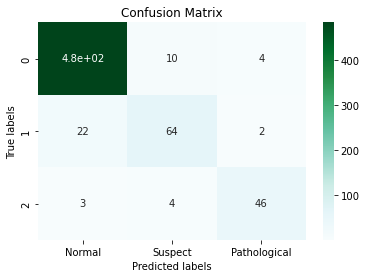

In [54]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_random_forest), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);

## Gradient Boosting classifier (GBC)

In [65]:
# Baseline model of gradient boosting classifier with default parameters:
gbc = GradientBoostingClassifier()
gbc_mod = gbc.fit(X_train, y_train)
print(f"Baseline gradient boosting classifier: {round(gbc_mod.score(X_test, y_test), 3)}")

pred_gbc = gbc_mod.predict(X_test)

Baseline gradient boosting classifier: 0.934


## Tuning parameters

Many strategies exist on how to tune parameters. Most data scientist see number of trees, tree depth and the learning rate as most crucial parameters.

Number of trees: A high number of trees can be computationally expensive. Generally, with a change in learning rate,n_estimators should also be adjusted (10-fold decrease in learning_rate should go in line with a approx. 10-fold increase in n_estimators.
Learning rate: Determines the contribution of each tree on the final outcome and controls how quickly the algorithm proceeds down the gradient descent (learns). This hyperparameter is also called shrinkage. Generally, the smaller this value, the more accurate the model can be but also will require more trees in the sequence.
Tree depth: Controls the depth of the individual trees. Typical values range from a depth of 3–8 but it is not uncommon to see a tree depth of 1.
Parameter tuning is a crucial task in finding the model with the highest predictive power. The code below how to tune parameters in a gradient boosting model for classification.

It's hyperparameter tuning time. First, we need to define a dictionary of GBC parameters for the grid search.

In [66]:
params_GBC = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [250, 500],
              "max_depth": [3, 5, 8]
              }

Second, we pass the GradientBoostingClassifier()
and params_GBC as the model and the parameter dictionary into the GridSearchCV function.



In [67]:
GridSearchCV_GBC = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=params_GBC, 
                                cv=cv_method,
                                verbose=1, 
                                n_jobs=2,
                                scoring="accuracy", 
                                return_train_score=True
                                )

In [68]:
# Fit model with train data
GridSearchCV_GBC.fit(X_train, y_train);

Fitting 3 folds for each of 42 candidates, totalling 126 fits


In [76]:
print("Classification Report")
print(classification_report(y_test, pred_gbc))

Classification Report
              precision    recall  f1-score   support

         1.0       0.95      0.98      0.96       497
         2.0       0.87      0.70      0.78        88
         3.0       0.88      0.92      0.90        53

    accuracy                           0.93       638
   macro avg       0.90      0.87      0.88       638
weighted avg       0.93      0.93      0.93       638



In [77]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_gbc))

Confusion Matrix:
[[485   8   4]
 [ 23  62   3]
 [  3   1  49]]


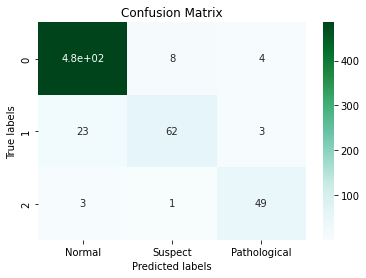

In [79]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, pred_gbc), annot=True, ax = ax, cmap = "BuGn");

# labels, title and ticks
ax.set_xlabel("Predicted labels");
ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"]);